In [57]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings
warnings.simplefilter("ignore")

In [133]:
df = pd.read_csv('Mall_Customers.csv')

In [26]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [134]:
cust_id = df['CustomerID']

In [28]:
df['Gender'] = df['Gender'].replace(['Female','Male'],[0,1])
df = df.drop(columns=['CustomerID'])

In [6]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20830748>,
      dtype=object)

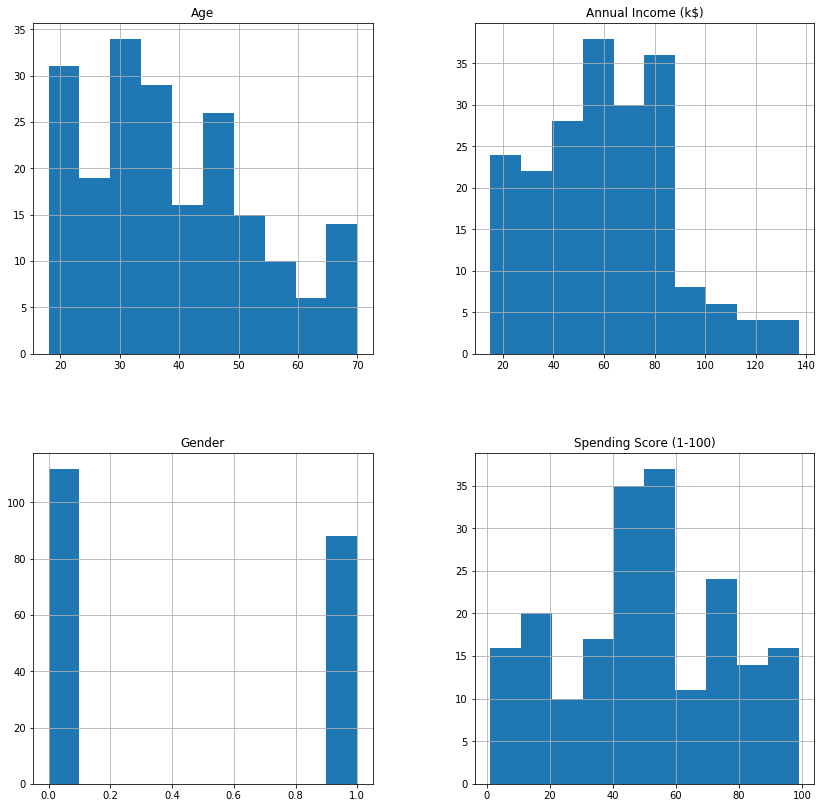

In [21]:
df.hist(bins=10,figsize=(14,14))

In [29]:
df1 = df.copy()

In [30]:
df1.loc[(df1['Age'] >= 18) & (df1['Age'] < 25), 'Age'] = 20
df1.loc[(df1['Age'] >= 25) & (df1['Age'] < 30), 'Age'] = 25
df1.loc[(df1['Age'] >= 30) & (df1['Age'] < 35), 'Age'] = 30
df1.loc[(df1['Age'] >= 35) & (df1['Age'] < 40), 'Age'] = 35
df1.loc[(df1['Age'] >= 40) & (df1['Age'] < 45), 'Age'] = 40
df1.loc[(df1['Age'] >= 45) & (df1['Age'] < 50), 'Age'] = 45
df1.loc[(df1['Age'] >= 50) & (df1['Age'] < 55), 'Age'] = 50
df1.loc[(df1['Age'] >= 55) & (df1['Age'] < 60), 'Age'] = 55
df1.loc[(df1['Age'] >= 60) & (df1['Age'] < 65), 'Age'] = 60
df1.loc[(df1['Age'] >= 65) & (df1['Age'] < 70), 'Age'] = 65
df1.loc[(df1['Age'] >= 70), 'Age'] = 65

In [94]:
df1.loc[(df1['Spending Score (1-100)'] >= 1) & (df1['Spending Score (1-100)'] < 5), 'Spending Score (1-100)'] = 1
df1.loc[(df1['Spending Score (1-100)'] >= 5) & (df1['Spending Score (1-100)'] < 10), 'Spending Score (1-100)'] = 5
df1.loc[(df1['Spending Score (1-100)'] >= 10) & (df1['Spending Score (1-100)'] < 15), 'Spending Score (1-100)'] = 10
df1.loc[(df1['Spending Score (1-100)'] >= 15) & (df1['Spending Score (1-100)'] < 20), 'Spending Score (1-100)'] = 15
df1.loc[(df1['Spending Score (1-100)'] >= 20) & (df1['Spending Score (1-100)'] < 25), 'Spending Score (1-100)'] = 20
df1.loc[(df1['Spending Score (1-100)'] >= 25) & (df1['Spending Score (1-100)'] < 30), 'Spending Score (1-100)'] = 25
df1.loc[(df1['Spending Score (1-100)'] >= 30) & (df1['Spending Score (1-100)'] < 35), 'Spending Score (1-100)'] = 30
df1.loc[(df1['Spending Score (1-100)'] >= 35) & (df1['Spending Score (1-100)'] < 40), 'Spending Score (1-100)'] = 35
df1.loc[(df1['Spending Score (1-100)'] >= 40) & (df1['Spending Score (1-100)'] < 45), 'Spending Score (1-100)'] = 40
df1.loc[(df1['Spending Score (1-100)'] >= 45) & (df1['Spending Score (1-100)'] < 50), 'Spending Score (1-100)'] = 45
df1.loc[(df1['Spending Score (1-100)'] >= 50) & (df1['Spending Score (1-100)'] < 55), 'Spending Score (1-100)'] = 50
df1.loc[(df1['Spending Score (1-100)'] >= 55) & (df1['Spending Score (1-100)'] < 60), 'Spending Score (1-100)'] = 55
df1.loc[(df1['Spending Score (1-100)'] >= 60) & (df1['Spending Score (1-100)'] < 65), 'Spending Score (1-100)'] = 60
df1.loc[(df1['Spending Score (1-100)'] >= 65) & (df1['Spending Score (1-100)'] < 70), 'Spending Score (1-100)'] = 65
df1.loc[(df1['Spending Score (1-100)'] >= 70) & (df1['Spending Score (1-100)'] < 75), 'Spending Score (1-100)'] = 70
df1.loc[(df1['Spending Score (1-100)'] >= 75) & (df1['Spending Score (1-100)'] < 80), 'Spending Score (1-100)'] = 75
df1.loc[(df1['Spending Score (1-100)'] >= 80) & (df1['Spending Score (1-100)'] < 85), 'Spending Score (1-100)'] = 80
df1.loc[(df1['Spending Score (1-100)'] >= 85) & (df1['Spending Score (1-100)'] < 90), 'Spending Score (1-100)'] = 85
df1.loc[(df1['Spending Score (1-100)'] >= 90) & (df1['Spending Score (1-100)'] < 95), 'Spending Score (1-100)'] = 90
df1.loc[(df1['Spending Score (1-100)'] >= 95) & (df1['Spending Score (1-100)'] < 100), 'Spending Score (1-100)'] = 95
df1.loc[(df1['Spending Score (1-100)'] >= 100) , 'Spending Score (1-100)'] = 100

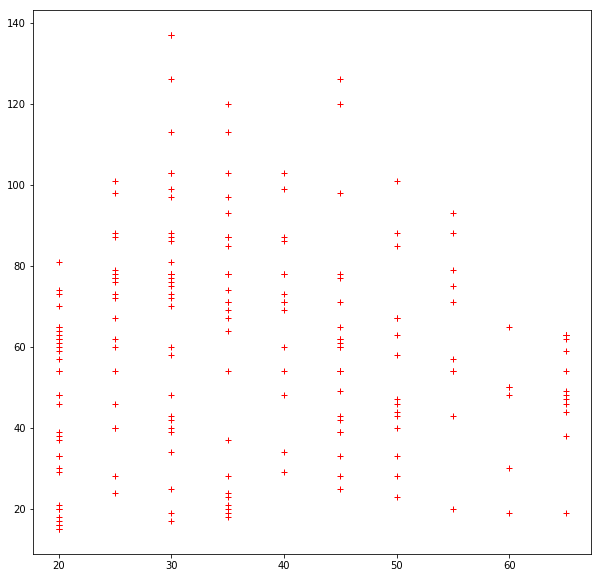

In [98]:
plt.figure(figsize=(10,10))
plt.plot(df1['Age'],df['Annual Income (k$)'],'r+')

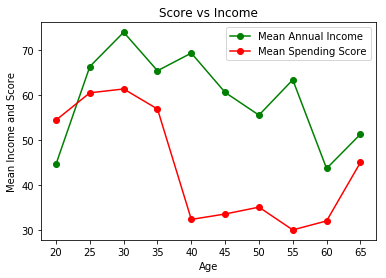

In [99]:
temp = df1.groupby('Age').mean()
plt.plot(temp.index,temp['Annual Income (k$)'],'g-',marker='o',label="Mean Annual Income")
plt.plot(temp.index,temp['Spending Score (1-100)'],'r-',marker='o',label="Mean Spending Score")


plt.legend(loc=0)
plt.xlabel("Age");
plt.ylabel("Mean Income and Score");
plt.xticks(temp.index);
plt.title("Score vs Income");

In [100]:
temp.corr()

,Gender,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,-0.324483,-0.080560
Annual Income (k$),-0.324483,1.000000,0.267387
Spending Score (1-100),-0.080560,0.267387,1.000000


In [62]:
df1.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,20,15,39
1,1,20,15,81
2,0,20,16,6
3,0,20,16,77
4,0,30,17,40


For n_clusters = 2 The average silhouette_score is : 0.2929534834494375
For n_clusters = 3 The average silhouette_score is : 0.3879031862129477
For n_clusters = 4 The average silhouette_score is : 0.41715844512445455
For n_clusters = 5 The average silhouette_score is : 0.44905370979081755
For n_clusters = 6 The average silhouette_score is : 0.45257410358142364
For n_clusters = 7 The average silhouette_score is : 0.4404917925169596
For n_clusters = 8 The average silhouette_score is : 0.4336675267428646


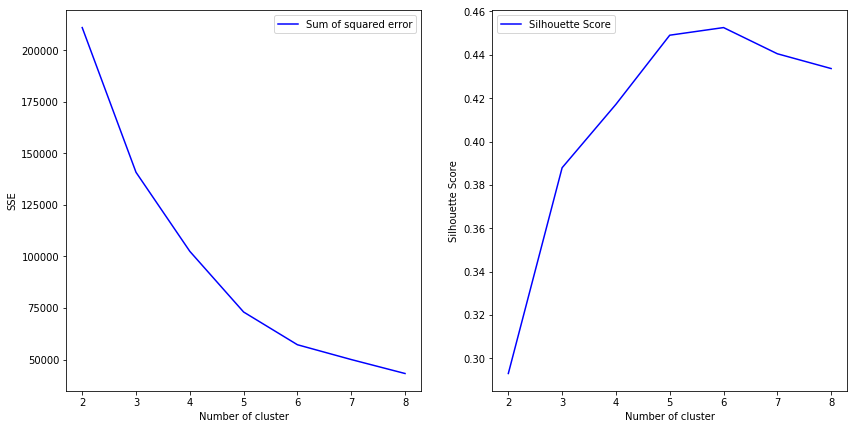

In [64]:
#Doing a silhoutte and elbow analysis to find the optimal number of clusters
"""
The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the 
mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). 
To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. 
Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

Elbow Criterion Method:

The idea behind elbow method is to run k-means clustering on a given dataset for a 
range of values of k (num_clusters, e.g k=1 to 10), and for each value of k, 
calculate sum of squared errors (SSE).
After that, plot a line graph of the SSE for each value of k. If the line graph looks like an 
arm - a red circle in below line graph (like angle), the "elbow" on the arm is the value of optimal k 
(number of cluster). Here, we want to minimize SSE. SSE tends to decrease toward 0 as we increase k 
(and SSE is 0 when k is equal to the number of data points in the dataset, because then each data point 
is its own cluster, and there is no error between it and the center of its cluster).

So the goal is to choose a small value of k that still has a low SSE, and the elbow usually represents 
where we start to have diminishing returns by increasing k.


"""
range_n_clusters = [2, 3, 4, 5, 6,7,8]
elbow = []
ss = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters = n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(df1)
    
    silhouette_avg = silhouette_score(df1, cluster_labels)
    ss.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    elbow.append(clusterer.inertia_) # Inertia: Sum of distances of samples to their closest cluster center

    
fig = plt.figure(figsize=(14,7))
fig.add_subplot(121)
plt.plot(range_n_clusters, elbow,'b-',label='Sum of squared error')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.legend()

fig.add_subplot(122)
plt.plot(range_n_clusters, ss,'b-',label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


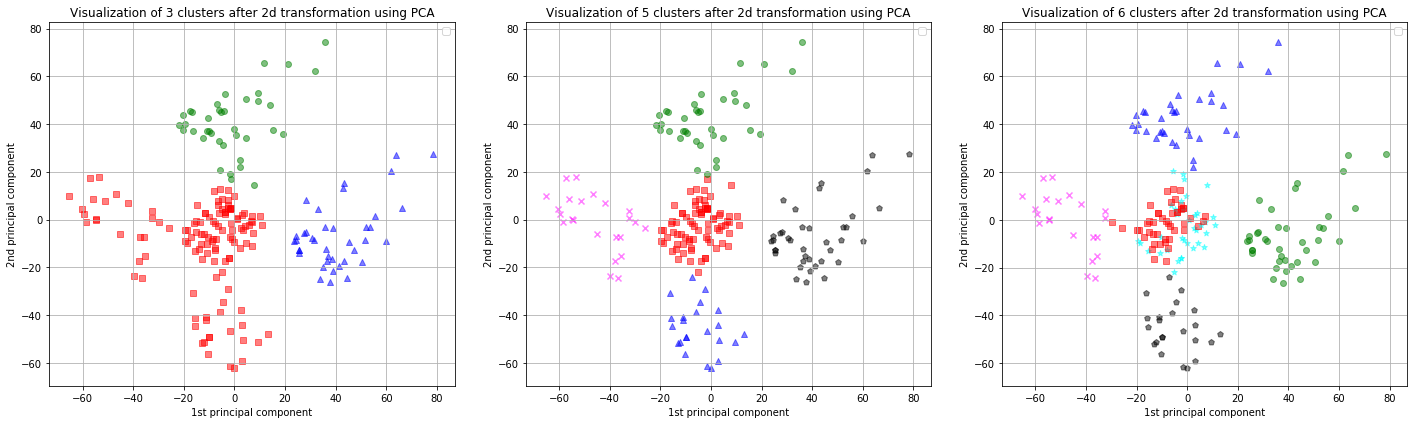

In [104]:
#Let's decompose this data using PCA to find out which one is better
# Let's see how data clusters for cluster 3, 5, and 6
pca = PCA(n_components=2).fit(df1)
df1_decomposed = pca.transform(df1)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,6))

color = ['blue','red','green']
marker = ['^', 's', 'o']
clusterer = KMeans(n_clusters = 3, random_state=42)
cluster_labels = clusterer.fit_predict(df1)
for i in range(len(cluster_labels)):
    l = cluster_labels[i]
    ax1.scatter(df1_decomposed[i,0], df1_decomposed[i,1],
    color=color[l],
    #label='class %s' %l,
    alpha=0.5,
    marker=marker[l]
    )

color = ['blue','red','green','magenta','black']
marker = ['^', 's', 'o','x','p']
clusterer = KMeans(n_clusters = 5, random_state=42)
cluster_labels = clusterer.fit_predict(df1)
for i in range(len(cluster_labels)):
    l = cluster_labels[i]
    ax2.scatter(df1_decomposed[i,0], df1_decomposed[i,1],
    color=color[l],
    #label='class %s' %l,
    alpha=0.5,
    marker=marker[l]
    )

color = ['blue', 'red', 'green','magenta', 'black','cyan']
marker = ['^', 's', 'o','x','p','*']
clusterer = KMeans(n_clusters = 6, random_state=42)
cluster_labels = clusterer.fit_predict(df1)
for i in range(len(cluster_labels)):
    l = cluster_labels[i]
    ax3.scatter(df1_decomposed[i,0], df1_decomposed[i,1],
    color=color[l],
    #label='class %s' %l,
    alpha=0.5,
    marker=marker[l]
    )
    
ax1.set_title('Visualization of 3 clusters after 2d transformation using PCA')    
ax2.set_title('Visualization of 5 clusters after 2d transformation using PCA')    
ax3.set_title('Visualization of 6 clusters after 2d transformation using PCA')    


for ax in (ax1, ax2, ax3):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()
plt.tight_layout()
plt.show()  

In [105]:
#Accordingly a strategy needs to be devised for different customers

In [107]:
clusterer = KMeans(n_clusters = 5, random_state=42)
cluster_labels = clusterer.fit_predict(df1)
df1['cluster_label'] = cluster_labels
df1['cluster_label'] = df1['cluster_label']+1

In [124]:
print(df1[df1['cluster_label']==1].groupby('cluster_label').mean())
print("\n\n############################################################################\n\n")
print(df1[df1['cluster_label']==1].groupby('Age').mean())
print("\n\n############################################################################\n\n")
print(df1[df1['cluster_label']==1].groupby('Spending Score (1-100)').mean())
print("\n\n############################################################################\n\n")
print(df1[df1['cluster_label']==1].groupby('Gender').mean())
print("\n\n############################################################################\n\n")

                 Gender        Age  Annual Income (k$)  Spending Score (1-100)
cluster_label                                                                 
1              0.391304  24.130435           26.304348               76.521739


############################################################################


       Gender  Annual Income (k$)  Spending Score (1-100)  cluster_label
Age                                                                     
20   0.357143           26.142857               77.857143              1
25   1.000000           26.000000               75.000000              1
30   0.250000           29.250000               67.500000              1
35   0.333333           23.333333               83.333333              1


############################################################################


                          Gender        Age  Annual Income (k$)  cluster_label
Spending Score (1-100)                                                        
60   

In [129]:
print(df1[df1['cluster_label']==2].groupby('cluster_label').mean())
print("\n\n############################################################################\n\n")
print(df1[df1['cluster_label']==2].groupby('Age').mean())
print("\n\n############################################################################\n\n")
print(df1[df1['cluster_label']==2].groupby('Spending Score (1-100)').mean())
print("\n\n############################################################################\n\n")
print(df1[df1['cluster_label']==2].groupby('Gender').mean())
print("\n\n############################################################################\n\n")

                 Gender        Age  Annual Income (k$)  Spending Score (1-100)
cluster_label                                                                 
2              0.417722  41.265823           55.291139               47.848101


############################################################################


       Gender  Annual Income (k$)  Spending Score (1-100)  cluster_label
Age                                                                     
20   0.466667           57.866667               48.666667              2
25   0.375000           55.625000               48.125000              2
30   0.166667           48.500000               49.166667              2
35   0.333333           61.666667               45.000000              2
40   0.400000           60.400000               45.000000              2
45   0.384615           55.384615               45.384615              2
50   0.222222           52.777778               48.333333              2
55   0.750000           5

In [130]:
print(df1[df1['cluster_label']==3].groupby('cluster_label').mean())
print("\n\n############################################################################\n\n")
print(df1[df1['cluster_label']==3].groupby('Age').mean())
print("\n\n############################################################################\n\n")
print(df1[df1['cluster_label']==3].groupby('Spending Score (1-100)').mean())
print("\n\n############################################################################\n\n")
print(df1[df1['cluster_label']==3].groupby('Gender').mean())
print("\n\n############################################################################\n\n")

                 Gender    Age  Annual Income (k$)  Spending Score (1-100)
cluster_label                                                             
3              0.527778  38.75               87.75               15.888889


############################################################################


       Gender  Annual Income (k$)  Spending Score (1-100)  cluster_label
Age                                                                     
20   0.750000           74.500000               11.250000              3
25   0.500000           74.500000               20.000000              3
30   0.600000          101.800000               12.200000              3
35   0.500000           87.250000               16.500000              3
40   0.428571           86.285714               17.142857              3
45   0.500000           95.000000               18.333333              3
50   0.333333           91.333333               18.333333              3
55   0.600000           81.200000    

In [131]:
print(df1[df1['cluster_label']==4].groupby('cluster_label').mean())
print("\n\n############################################################################\n\n")
print(df1[df1['cluster_label']==4].groupby('Age').mean())
print("\n\n############################################################################\n\n")
print(df1[df1['cluster_label']==4].groupby('Spending Score (1-100)').mean())
print("\n\n############################################################################\n\n")
print(df1[df1['cluster_label']==4].groupby('Gender').mean())
print("\n\n############################################################################\n\n")

                 Gender        Age  Annual Income (k$)  Spending Score (1-100)
cluster_label                                                                 
4              0.391304  43.695652           26.304348               19.043478


############################################################################


       Gender  Annual Income (k$)  Spending Score (1-100)  cluster_label
Age                                                                     
20   0.500000                15.5                    20.0              4
30   0.000000                17.0                    40.0              4
35   0.400000                24.0                    22.0              4
40   0.000000                31.5                    22.5              4
45   0.200000                32.8                    21.0              4
50   0.666667                28.0                    12.0              4
55   0.000000                20.0                    15.0              4
60   1.000000            

In [132]:
print(df1[df1['cluster_label']==5].groupby('cluster_label').mean())
print("\n\n############################################################################\n\n")
print(df1[df1['cluster_label']==5].groupby('Age').mean())
print("\n\n############################################################################\n\n")
print(df1[df1['cluster_label']==5].groupby('Spending Score (1-100)').mean())
print("\n\n############################################################################\n\n")
print(df1[df1['cluster_label']==5].groupby('Gender').mean())
print("\n\n############################################################################\n\n")

                 Gender        Age  Annual Income (k$)  Spending Score (1-100)
cluster_label                                                                 
5              0.461538  30.769231           86.538462               80.128205


############################################################################


       Gender  Annual Income (k$)  Spending Score (1-100)  cluster_label
Age                                                                     
25   0.500000           85.125000               79.375000              5
30   0.388889           87.833333               78.888889              5
35   0.500000           86.833333               81.250000              5
40   1.000000           71.000000               95.000000              5


############################################################################


                          Gender        Age  Annual Income (k$)  cluster_label
Spending Score (1-100)                                                        
60   

In [174]:
segmented_customer_list = pd.concat([cust_id,df1],axis=1)
segmented_customer_list.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_label
0,1,1,20,15,35,4
1,2,1,20,15,80,1
2,3,0,20,16,5,4
3,4,0,20,16,75,1
4,5,0,30,17,40,4


In [152]:
group1 = np.array(segmented_customer_list[segmented_customer_list['cluster_label']==1]['CustomerID'])
group2 = np.array(segmented_customer_list[segmented_customer_list['cluster_label']==2]['CustomerID'])
group3 = np.array(segmented_customer_list[segmented_customer_list['cluster_label']==3]['CustomerID'])
group4 = np.array(segmented_customer_list[segmented_customer_list['cluster_label']==4]['CustomerID'])
group5 = np.array(segmented_customer_list[segmented_customer_list['cluster_label']==5]['CustomerID'])

In [171]:
df['cluster_label'] = cluster_labels
df['cluster_label'] = df1['cluster_label']+1
df.to_csv('Segmented_Customers.csv')

In [172]:
df.head(7)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_label
0,1,Male,19,15,39,5
1,2,Male,21,15,81,2
2,3,Female,20,16,6,5
3,4,Female,23,16,77,2
4,5,Female,31,17,40,5
5,6,Female,22,17,76,2
6,7,Female,35,18,6,5
